In [ ]:
# for SCC jupyter
import os
os.environ["WANDB_DISABLED"] = "true"

In [ ]:
import pandas as pd
import os
# should test if the number of df rows matches the number of txt rows
# some data files meet the problem:  
# such as twitter-2016train-A, should be 6000 examples, but some lines are read as one line

data_path='./data/'
import os

train_file='./data/training.1600000.processed.noemoticon.csv'
test_file='./data/twitter-2016test-A.txt'



In [ ]:
df_train=pd.read_csv(train_file,sep=',',names=['sentiment','id','time','no_query','user','text'])

In [ ]:
print(len(df_train[df_train['sentiment']==0]),len(df_train[df_train['sentiment']==2]),len(df_train[df_train['sentiment']==4]))

800000 0 800000


In [ ]:
import nltk
nltk.download('punkt')
df_test=None
length_threshold=150 # number of words in a sentence, try to filter out the wrong read lines

df_test=pd.read_csv(test_file,sep='\t',names=['id','sentiment','text','none'])
for idx, text in enumerate(df_test.text.values):
    tokens = nltk.word_tokenize(text)
    if len(tokens)>length_threshold:
        df_test.drop(index=[idx])
df_test=df_test[df_test.sentiment.isin(['negative','positive'])]
df_test
# should be 20633 rows, but get 20632 (?)

[nltk_data] Downloading package punkt to
[nltk_data]     /usr4/cs640g/gqiu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,id,sentiment,text,none
2,619971047195045888,negative,If these runway renovations at the airport pre...,NaN
4,619987808317407232,positive,A portion of book sales from our Harper Lee/Go...,NaN
5,619994586182619136,positive,"Excited to read ""Go Set a Watchman"" on Tuesday...",NaN
6,619998879447162881,positive,Watching Miss USA tomorrow JUST to see @Travis...,NaN
8,620013074272137216,positive,Call for reservations for lunch or dinner tomo...,NaN
...,...,...,...,...
20617,681820700592701440,positive,"@viagogo hiya, do you know when my tickets for...",NaN
20619,681827597962096641,positive,@PurposeTourCom Selling 4 Justin bieber standi...,NaN
20620,681828714376749057,positive,@Chidwack__ omg yes!! Then I'll be in Milan fo...,NaN
20628,681879579129200640,positive,"Iran ranks 1st in liver surgeries, Allah bless...",NaN


In [ ]:
!nvidia-smi

Wed May  4 03:00:42 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.57.02    Driver Version: 470.57.02    CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-PCIE...  On   | 00000000:3B:00.0 Off |                    0 |
| N/A   37C    P0    26W / 250W |      0MiB / 16160MiB |      0%   E. Process |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  Tesla V100-PCIE...  On   | 00000000:D8:00.0 Off |                    0 |
| N/A   

In [ ]:
train_texts=df_train.text.values
train_sentiments=df_train.sentiment.values
print(max(train_sentiments),min(train_sentiments))

4 0


In [ ]:
test_texts=df_test.text.values
test_sentiments=df_test.sentiment.values


In [ ]:
train_labels=[int(x/4) for x in train_sentiments]
print(max(train_labels),min(train_labels))
print(train_sentiments[-100:],train_labels[-100:])

1 0
[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4] [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [ ]:
sent2labels={'negative':0, 'positive':1}
test_labels=[sent2labels[x] for x in test_sentiments]

In [ ]:
df_train.insert(df_train.shape[1],'label',train_labels)
df_train

,sentiment,id,time,no_query,user,text,label
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,0
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,0
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,0
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",0
...,...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...,1
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...,1
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...,1
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...,1


In [ ]:
df_test.insert(df_test.shape[1],'label',test_labels)

In [ ]:
# split the train dataset to train and val with 9:1 ratio
from sklearn.model_selection import train_test_split
df_train_split,df_val_split=train_test_split(df_train[['text','label']], test_size=.1)
print(df_train_split[df_train_split['label']==1])

                                                      text  label
1396250  @jeffpower So is it hot as blazes down there o...      1
1077135  @kittykat3713 Go with either the Wynn or Palaz...      1
1522196  @adrianarambulo is anchoring the morning show ...      1
1522211  @katyperry That's what you get for waking up i...      1
1263347  @DianaRusso @Simon_Ashaan offline 4 awhile. re...      1
...                                                    ...    ...
1040362         @UrbanEyeCandy yea i will wen i get to pc       1
882513   @Amzieebbz  i cant listen to radio one now, th...      1
836609   @ShelliMayfield  My pleasure. Having a quiet t...      1
1145063  @surpass renzuken.net, love surpass as much as...      1
1212744  BEHOLD! The official NEW MOON TRAILER!  http:/...      1

[720119 rows x 2 columns]


In [ ]:
from datasets import Dataset,Features,Value,ClassLabel
# class_names = ["negative", "neutral", "positive"]
# sentiment_features = Features({'text': Value('string'), 'label': ClassLabel(names=class_names)})

# train_dataset=Dataset.from_pandas(df_train_split[['text','label']],features=sentiment_features)
# val_dataset=Dataset.from_pandas(df_val_split[['text','label']],features=sentiment_features)

train_dataset=Dataset.from_pandas(df_train_split[['text','label']])
val_dataset=Dataset.from_pandas(df_val_split[['text','label']])

In [ ]:
# test_dataset=Dataset.from_pandas(df_test[['text','label']],features=sentiment_features)
test_dataset=Dataset.from_pandas(df_test[['text','label']])

In [ ]:
import gc,torch
trainer=None
model=None
model0=None
trainer0=None
gc.collect()
torch.cuda.empty_cache()

In [ ]:
model_names=['prajjwal1/bert-mini',"bert-base-cased",'xlnet-base-cased','gpt2','distilgpt2','sshleifer/tiny-gpt2']
model_index=4
model_name=model_names[model_index]

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained(model_name,force_download=True,)

def tokenize_function(examples):
    if model_name in ['gpt2', 'distilgpt2','sshleifer/tiny-gpt2']: # for gpt model
        tokenizer.pad_token = tokenizer.eos_token
    return tokenizer(examples["text"], padding='max_length', truncation=True,max_length=128)

tokenized_train_datasets = train_dataset.map(tokenize_function, batched=True)
tokenized_val_datasets = val_dataset.map(tokenize_function, batched=True)

Downloading:   0%|          | 0.00/762 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/0.99M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

  0%|          | 0/1440 [00:00<?, ?ba/s]

  0%|          | 0/160 [00:00<?, ?ba/s]

In [ ]:
tokenized_test_datasets = test_dataset.map(tokenize_function, batched=True)

  0%|          | 0/11 [00:00<?, ?ba/s]

In [ ]:
len(tokenized_train_datasets[0]['input_ids'])

128

In [ ]:
from transformers import AutoModelForSequenceClassification

# model init function for hyperparameter search
def model_init():
    return AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2, return_dict=True)
# init the model for train 
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)
if model_name in ['gpt2','distilgpt2','sshleifer/tiny-gpt2']: # for gpt model
    model.config.pad_token_id = model.config.eos_token_id

Some weights of the model checkpoint at distilgpt2 were not used when initializing GPT2ForSequenceClassification: ['lm_head.weight']
- This IS expected if you are initializing GPT2ForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing GPT2ForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of GPT2ForSequenceClassification were not initialized from the model checkpoint at distilgpt2 and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
import numpy as np
from datasets import load_metric

metric = load_metric("accuracy")
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

In [ ]:
from transformers import TrainingArguments,Trainer


training_args = TrainingArguments(output_dir='noisy_'+model_name+'_ckpt',
                                  learning_rate=5e-5,
                                  weight_decay=0.01,
                                  warmup_ratio=0.3,
                                  per_device_train_batch_size=96,
                                  per_device_eval_batch_size=96,
                                  num_train_epochs=5,
                                  evaluation_strategy="epoch",
#                                   eval_steps=1000,
                                 )
trainer = Trainer(
    model=model, # for train
    # model_init=model_init, # for hyperparas search
    args=training_args,
    train_dataset=tokenized_train_datasets,
    eval_dataset=tokenized_val_datasets,
    compute_metrics=compute_metrics,
)

Using the `WAND_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


In [ ]:
## Code use to search to best hyperparameters
# single gpu, use optuna as backend (use pip install optuna)

############## not used now ###############
# def my_hp_space(trial):
#     return {
#         "learning_rate": trial.suggest_float("learning_rate", [5e-5, 3e-5, 2e-5, 2e-4], log=True),
#         "num_train_epochs": trial.suggest_int("num_train_epochs", [1,3, 5]),
#         "seed": trial.suggest_int("seed", 1, 40),
#         "per_device_train_batch_size": trial.suggest_categorical("per_device_train_batch_size", [4, 8, 16, 32, 64]),
#     }
# trainer.hyperparameter_search(
#     direction="maximize", 
#     backend="optuna", 
#     hp_space=my_hp_space,
# )

In [ ]:
trainer.train()

The following columns in the training set  don't have a corresponding argument in `GPT2ForSequenceClassification.forward` and have been ignored: __index_level_0__, text.
***** Running training *****
  Num examples = 1440000
  Num Epochs = 5
  Instantaneous batch size per device = 96
  Total train batch size (w. parallel, distributed & accumulation) = 96
  Gradient Accumulation steps = 1
  Total optimization steps = 75000


Epoch,Training Loss,Validation Loss,Accuracy
1,0.327100,0.318271,0.865337
2,0.301400,0.296037,0.875075
3,0.271500,0.285896,0.880381
4,0.243000,0.287721,0.882844
5,0.218200,0.298042,0.882613


Saving model checkpoint to noisy_distilgpt2_ckpt/checkpoint-500
Configuration saved in noisy_distilgpt2_ckpt/checkpoint-500/config.json
Model weights saved in noisy_distilgpt2_ckpt/checkpoint-500/pytorch_model.bin
Saving model checkpoint to noisy_distilgpt2_ckpt/checkpoint-1000
Configuration saved in noisy_distilgpt2_ckpt/checkpoint-1000/config.json
Model weights saved in noisy_distilgpt2_ckpt/checkpoint-1000/pytorch_model.bin
Saving model checkpoint to noisy_distilgpt2_ckpt/checkpoint-1500
Configuration saved in noisy_distilgpt2_ckpt/checkpoint-1500/config.json
Model weights saved in noisy_distilgpt2_ckpt/checkpoint-1500/pytorch_model.bin
Saving model checkpoint to noisy_distilgpt2_ckpt/checkpoint-2000
Configuration saved in noisy_distilgpt2_ckpt/checkpoint-2000/config.json
Model weights saved in noisy_distilgpt2_ckpt/checkpoint-2000/pytorch_model.bin
Saving model checkpoint to noisy_distilgpt2_ckpt/checkpoint-2500
Configuration saved in noisy_distilgpt2_ckpt/checkpoint-2500/config.js

TrainOutput(global_step=75000, training_loss=0.28851592203776044, metrics={'train_runtime': 29593.3312, 'train_samples_per_second': 243.298, 'train_steps_per_second': 2.534, 'total_flos': 2.351755689984e+17, 'train_loss': 0.28851592203776044, 'epoch': 5.0})

In [ ]:
# import gc,torch
# trainer=None
# model=None
# model0=None
# trainer0=None
# gc.collect()
# torch.cuda.empty_cache()

Wed May  4 11:15:43 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.57.02    Driver Version: 470.57.02    CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-PCIE...  On   | 00000000:3B:00.0 Off |                    0 |
| N/A   57C    P0    49W / 250W |  11433MiB / 16160MiB |      0%   E. Process |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  Tesla V100-PCIE...  On   | 00000000:D8:00.0 Off |                    0 |
| N/A   

In [ ]:
# trainer.evaluate(tokenized_train_datasets)

In [ ]:
# trainer.evaluate(tokenized_val_datasets)

In [ ]:
trainer.evaluate(tokenized_test_datasets)

The following columns in the evaluation set  don't have a corresponding argument in `GPT2ForSequenceClassification.forward` and have been ignored: __index_level_0__, text.
***** Running Evaluation *****
  Num examples = 10290
  Batch size = 96


{'eval_loss': 0.6774290800094604,
 'eval_accuracy': 0.7494655004859087,
 'eval_runtime': 14.6582,
 'eval_samples_per_second': 701.996,
 'eval_steps_per_second': 7.368,
 'epoch': 5.0}

In [ ]:
trainer.save_model('noisy_'+model_name+'_model')

Saving model checkpoint to noisy_distilgpt2_model
Configuration saved in noisy_distilgpt2_model/config.json
Model weights saved in noisy_distilgpt2_model/pytorch_model.bin


In [ ]:
# access the training history to plot the loss graph
his=[]
for item in trainer.state.log_history:
    if item['epoch'] in [1.0,2.0,3.0,4.0,5.0]:
        his.append(item)
his

[{'loss': 0.3271,
  'learning_rate': 3.3333333333333335e-05,
  'epoch': 1.0,
  'step': 15000},
 {'eval_loss': 0.31827130913734436,
  'eval_accuracy': 0.8653375,
  'eval_runtime': 223.2469,
  'eval_samples_per_second': 716.695,
  'eval_steps_per_second': 7.467,
  'epoch': 1.0,
  'step': 15000},
 {'loss': 0.3014,
  'learning_rate': 4.2857142857142856e-05,
  'epoch': 2.0,
  'step': 30000},
 {'eval_loss': 0.2960371971130371,
  'eval_accuracy': 0.875075,
  'eval_runtime': 223.4813,
  'eval_samples_per_second': 715.944,
  'eval_steps_per_second': 7.459,
  'epoch': 2.0,
  'step': 30000},
 {'loss': 0.2715,
  'learning_rate': 2.857142857142857e-05,
  'epoch': 3.0,
  'step': 45000},
 {'eval_loss': 0.2858964502811432,
  'eval_accuracy': 0.88038125,
  'eval_runtime': 225.5414,
  'eval_samples_per_second': 709.404,
  'eval_steps_per_second': 7.391,
  'epoch': 3.0,
  'step': 45000},
 {'loss': 0.243,
  'learning_rate': 1.4285714285714285e-05,
  'epoch': 4.0,
  'step': 60000},
 {'eval_loss': 0.2877210

In [ ]:

train_losses=[]
val_losses=[]
for i in range(5):
    train_losses.append(his[2*i]['loss'])
    val_losses.append(his[2*i+1]['eval_loss'])
print(train_losses,'\n',val_losses)

[0.3271, 0.3014, 0.2715, 0.243, 0.2182] 
 [0.31827130913734436, 0.2960371971130371, 0.2858964502811432, 0.28772100806236267, 0.2980421483516693]


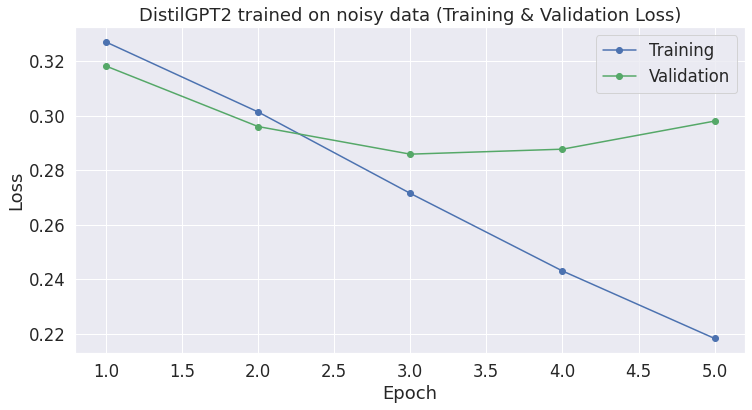

In [ ]:
import matplotlib.pyplot as plt
# % matplotlib inline

import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot([1, 2, 3, 4,5],train_losses, 'b-o', label="Training")
plt.plot([1, 2, 3, 4,5],val_losses, 'g-o', label="Validation")

# Label the plot.
plt.title("DistilGPT2 trained on noisy data (Training & Validation Loss)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

In [ ]:
# model = AutoModelForSequenceClassification.from_pretrained(model_name+'/checkpoint-1000', num_labels=3)

In [ ]:
# trainer = Trainer(
#     model=model, # for train
#     # model_init=model_init, # for hyperparas search
#     args=training_args,
#     train_dataset=tokenized_train_datasets,
#     eval_dataset=tokenized_val_datasets,
#     compute_metrics=compute_metrics,
# )

In [ ]:
# trainer.state.log_history

In [ ]:
# trainer.evaluate(tokenized_test_datasets)

In [ ]:
# model0 = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=3)
# trainer0= Trainer(
#     model=model0, # for train
#     # model_init=model_init, # for hyperparas search
#     args=training_args,
#     train_dataset=tokenized_train_datasets,
#     eval_dataset=tokenized_val_datasets,
#     compute_metrics=compute_metrics,
# )
# trainer0.evaluate(tokenized_test_datasets)